Multiple Linear Regression

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
california = fetch_california_housing

In [6]:
california()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
california().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
print(california().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
## since Multiple Linear regression we have multiple Independent features
california().data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [10]:
california().data.shape

(20640, 8)

In [11]:
california().target_names

['MedHouseVal']

In [12]:
california().feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
california().target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [14]:
dataset = pd.DataFrame(california().data , columns = california().feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
dataset['Price'] = california().target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [18]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

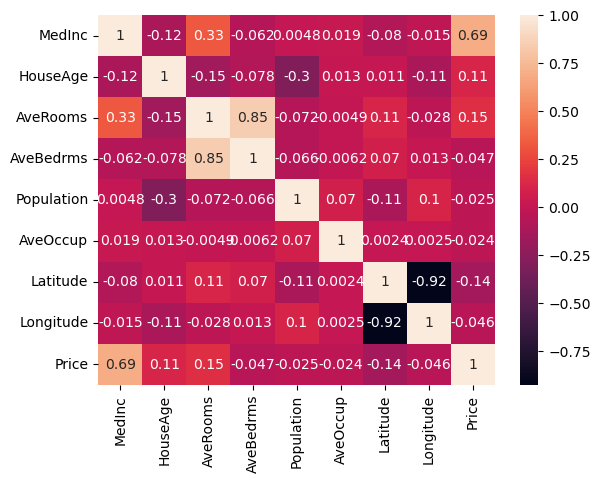

In [19]:
sns.heatmap(dataset.corr() , annot = True)

In [20]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
## different Dependent and Independdent features
X = dataset.iloc[: , :-1]
y = dataset.iloc[: , 1]

In [22]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
y

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((13828, 8), (6812, 8), (13828,), (6812,))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [28]:
from sklearn.linear_model import LinearRegression ## Trainig th e Model

In [29]:
regression = LinearRegression()

In [30]:
regression

LinearRegression()

In [31]:
regression.fit(X_train_scaled , y_train)

LinearRegression()

In [32]:
## slopes of 8 features

regression.coef_

array([ 2.50960063e-15,  1.26227650e+01, -1.59872116e-14,  3.99680289e-15,
        3.37230244e-15, -7.91033905e-16,  2.66453526e-15, -1.72084569e-15])

In [33]:
## Intercept
regression.intercept_

28.5898900781024

In [34]:
## Performance Matrices wrt cost Function

In [35]:
## Prediction
y_pred_test = regression.predict(X_test_scaled)
y_pred_test

array([12., 27., 12., ..., 32., 17., 44.])

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_sqaured_error(y_test , y_pred_test))
print(mean_absolute_error(y_test , y_pred_test))
print(np.sqrt(mean_sqaured_error(y_test , y_pred_test)))

NameError: name 'mean_sqaured_error' is not defined

In [37]:
## R sqaured and Adjusted r Square
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred_test)
print(score)

1.0


Since Models are Trained we will now use PICKLING TO Use it in Future 

In [38]:
import pickle
pickle.dump(scaler , open('scaler.pkl', 'wb' ))
pickle.dump(scaler , open('regressor.pkl', 'wb' ))

In [39]:
model_regressor = pickle.load(open('regressor.pkl' , 'rb'))
model_regressor.predict(X_test_scaled)

AttributeError: 'StandardScaler' object has no attribute 'predict'

In [40]:
standard_scaler = pickle.load(open('scaler.pkl' , 'rb'))

In [41]:
model_regressor.predict(standard_scaler.transform(X_test))

AttributeError: 'StandardScaler' object has no attribute 'predict'

<AxesSubplot: >

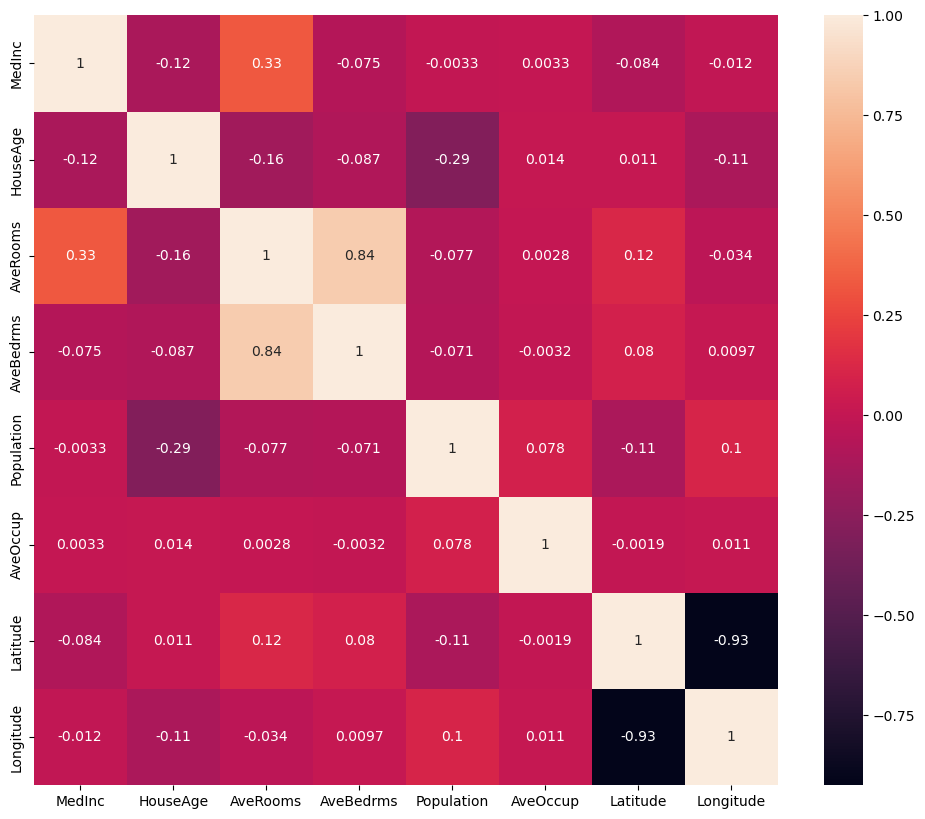

In [42]:
# FEATURE SELECTION TECHNIQUE




## Multicollinearity :- When any 2 or more Features are highly corellated with each other
## so that any one independent feature can be eleminated

## Checking for Multicollinearity
plt.figure(figsize = (12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

NOW COMES MODEL TRAINING

In [43]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.117402,0.328938,-0.074974,-0.003313,0.003280,-0.083547,-0.011931
HouseAge,-0.117402,1.000000,-0.157322,-0.086739,-0.291484,0.013794,0.011357,-0.106642
AveRooms,0.328938,-0.157322,1.000000,0.838570,-0.077121,0.002794,0.115156,-0.034073
AveBedrms,-0.074974,-0.086739,0.838570,1.000000,-0.071246,-0.003240,0.080399,0.009698
Population,-0.003313,-0.291484,-0.077121,-0.071246,1.000000,0.077840,-0.107319,0.099799
AveOccup,0.003280,0.013794,0.002794,-0.003240,0.077840,1.000000,-0.001851,0.011470
Latitude,-0.083547,0.011357,0.115156,0.080399,-0.107319,-0.001851,1.000000,-0.925791
Longitude,-0.011931,-0.106642,-0.034073,0.009698,0.099799,0.011470,-0.925791,1.000000


In [44]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[ i , j]) > threshold:
                colname = corr_matrix.columns[i]
                coll_corr.add(colname)
                
        return col_corr
            

In [45]:
## threshold -- Domain expert

corr_features = correlation(X_train , 0.85)
corr_features

set()

In [46]:
## Drop features when correlation is more than 85%
X_train.drop(corr_features, axis = 1 , inplace = True)
X_test.drop(corr_features, axis = 1 , inplace = True)

In [47]:
X_train.shape , X_test.shape

((13828, 8), (6812, 8))

 Feature scaling or Standaradisation Basically Applying Z- Score

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [50]:
## Ends here.....(Class)

In [51]:
## Boxplots to understand effects of Standard scaler




/tmp/ipykernel_355/2661750414.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot (1 , 2 , 1)


Text(0.5, 1.0, 'X_train After Scaling')

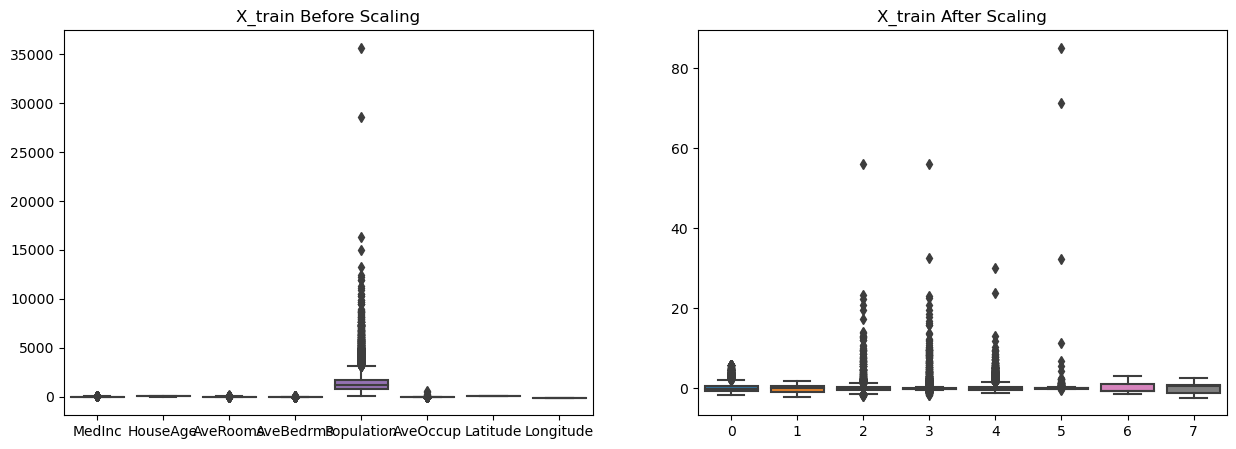

In [52]:
plt.subplots(figsize = (15,5))
plt.subplot (1 , 2 , 1)
sns.boxplot(data = X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train After Scaling")

Linear Regression Model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [54]:
linreg = LinearRegression()
linreg.fit(X_train_scaled , y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score" , score)

Mean Absolute Error:  6.824318626997146e-15
R2 Score 1.0


LASSO REGRESSION

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled , y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score" , score)

Mean Absolute Error:  0.830511555527553
R2 Score 0.9937229774777013


Ridge Regression Model

In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled , y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score" , score)

Mean Absolute Error:  0.0008126043929732904
R2 Score 0.9999999936163929


Elasticnet regression

In [62]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled , y_train )
y_pred = elastic.predict(X_test_scaled)
print("R2 Score" , score)
print("Mean Absolute Error: ", mae)


R2 Score 0.9999999936163929
Mean Absolute Error:  0.0008126043929732904


In [65]:
import pickle
pickle.dump(scaler , open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('ridge.pkl' , 'wb'))